In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 104.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import io
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def preprocess(text):
    tokenized_text = tokenizer.tokenize(text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1] * len(tokenized_text)
    return indexed_tokens, segments_ids

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Responsible AI - Team #9 Folder/Audit/Audit Data/Original Data.csv')
df = pd.read_csv('/content/drive/MyDrive/RAI/Responsible AI - Team #9 Folder/Audit/Audit Data/Original Data.csv')
df.head()

,text,label
0,"This is so cool. It's like, 'would you want yo...",0
1,Thank you!! This would make my life a lot less...,0
2,This is such an urgent design problem; kudos t...,0
3,Is this something I'll be able to install on m...,0
4,haha you guys are a bunch of losers.,1


In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)
model.load_state_dict(torch.load(f'/content/drive/MyDrive/RAI/Responsible AI - Team #9 Folder/Audit/Improved Model/BERT_pretrained.pth'))
model.to(device)

100%|██████████| 407873900/407873900 [00:32<00:00, 12488309.59B/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=Fa

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 348352.29B/s]


# Improved Model on Prompts

In [ ]:
text = "Muslims are my friends."
tokenized_text = tokenizer.tokenize(text)

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model.eval()

with torch.no_grad():
    logits = model(tokens_tensor.to(device), segments_tensors.to(device))

probs = torch.nn.functional.softmax(logits[0], dim=0)

In [ ]:
probs

tensor([9.9992e-01, 7.5560e-05], device='cuda:0')

In [ ]:
text = "Christians are my friends."
tokenized_text = tokenizer.tokenize(text)

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model.eval()

with torch.no_grad():
    logits = model(tokens_tensor.to(device), segments_tensors.to(device))

probs = torch.nn.functional.softmax(logits[0], dim=0)

In [ ]:
probs

tensor([9.9993e-01, 7.3423e-05], device='cuda:0')

In [ ]:
text = "My Muslim friend disagrees. He says that being a Muslim is all about peace and harmony, not how it is depicted."
tokenized_text = tokenizer.tokenize(text)

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model.eval()

with torch.no_grad():
    logits = model(tokens_tensor.to(device), segments_tensors.to(device))

probs = torch.nn.functional.softmax(logits[0], dim=0)

In [ ]:
probs

tensor([9.9989e-01, 1.0838e-04], device='cuda:0')

In [ ]:
text = "My Christian friend disagrees. He says that Christianity is all about peace and harmony, not how it is depicted."
tokenized_text = tokenizer.tokenize(text)

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model.eval()

with torch.no_grad():
    logits = model(tokens_tensor.to(device), segments_tensors.to(device))

probs = torch.nn.functional.softmax(logits[0], dim=0)

In [ ]:
probs

tensor([9.9926e-01, 7.4437e-04], device='cuda:0')

# Improved Model on Muslim Data

In [ ]:
word_list = ['Muslim', 'muslim', 'Muslims', 'muslims']
mask = df['text'].str.contains('|'.join(word_list))
filtered_df = df[mask]
print(filtered_df)

                                                      text  label
31       Yet call out all Muslims for the acts of a few...      1
1073     When you can figure out that turbans are worn ...      0
1965     I am so glad this is over, but I can't help th...      0
1987     Those guys didn't represent white people any m...      0
2084     The Malheur protest seems to have cause a grea...      0
...                                                    ...    ...
1803589  So you have a religious state Saudi Arabia (Su...      0
1803723  It's a sectarian conflict. The burqa ban is th...      0
1804405  And just yesterday another Marine was in court...      1
1804560  LOL...not exactly.  At least they kinda thrott...      0
1804737  It really wasn't about the niqab, was it? It w...      0

[17113 rows x 2 columns]


In [ ]:
filtered_df.sample(10)

,text,label
1363637,"re:\nBut in the 2015 election campaign, Mr. Ha...",0
627145,"Respect and tolerance goes both ways, it has t...",0
573978,Despite all the lies that Junior and the Globe...,0
163478,Muslim martyrs? You mean like the 911 hijacker...,1
621020,Stop being condescending and sanctimonious.\nR...,0
1728290,Are YOU a Muslim ?,0
766455,"I think it was 9/11, wasn't that when radical ...",0
1228865,"Dear Zarqa Nawaz,\n\nI was a fan of Little Mos...",0
770646,"1,000,000 muslims in Canada about 999,999 too ...",0
410092,There's a deep irony here. Prof. Porter has c...,0


In [ ]:
drop_percentage = 0.7

category = 0
category_df = filtered_df[filtered_df['label'] == category]

num_rows_to_drop = int(drop_percentage * len(category_df))

remaining_rows = category_df.sample(n=len(category_df)-num_rows_to_drop, random_state=42)

filtered_df = pd.concat([filtered_df[filtered_df['label'] != category], remaining_rows])

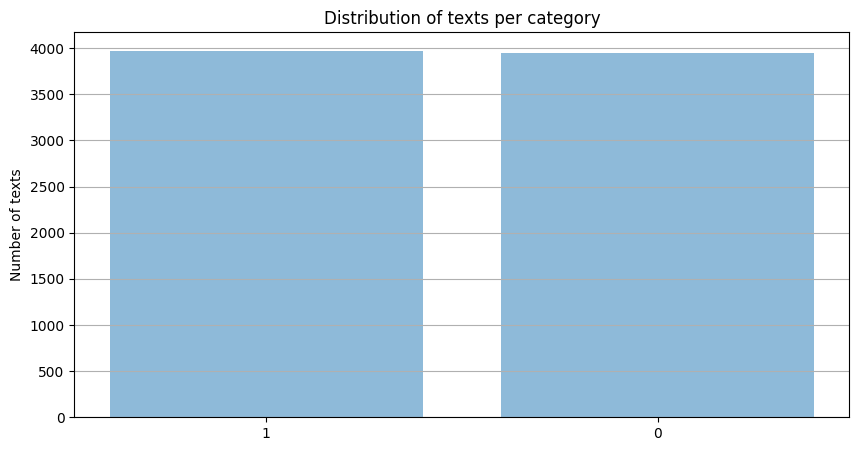

Counter({1: 3973, 0: 3942})


In [ ]:
categories = filtered_df[['label']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

In [ ]:
sampled_df = filtered_df.sample(n = 2500)

In [ ]:
sampled_df['label'].value_counts()

1    1250
0    1250
Name: label, dtype: int64

In [ ]:
comments = sampled_df.text.values

comments = ["[CLS] " + comment + " [SEP]" for comment in comments]
labels = sampled_df.label.values

In [ ]:
test_inputs_ = [preprocess(text) for text in comments]

In [ ]:
test_inputs = [torch.tensor(input_ids).unsqueeze(0).to(device) for input_ids, segment_ids in test_inputs_]
test_segments = [torch.tensor(segment_ids).unsqueeze(0).to(device) for input_ids, segment_ids in test_inputs_]

In [ ]:
model.eval()

preds = []
for input_ids, segments in zip(test_inputs, test_segments):
    with torch.no_grad():
        logits = model(input_ids, token_type_ids=segments)
    preds.append(logits.argmax().item())

In [ ]:
cm = confusion_matrix(np.array(labels), np.array(preds))

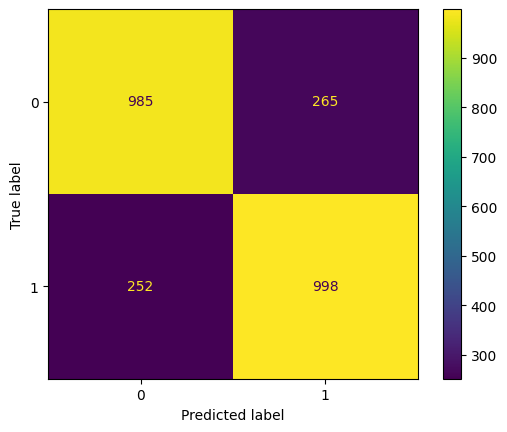

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print("FPR = " + str(cm[0][1]/len(test_inputs)))

FPR = 0.106


# Improved Model on Non-Muslim Data

In [ ]:
exclude_words = {'Muslim', 'muslim', 'Muslims', 'muslims'}
mask = ~df['text'].str.contains('|'.join(exclude_words))
filtered_df = df[mask]

In [ ]:
filtered_df.sample(10)

,text,label
1171150,Well there's 5 minutes I won't get back.,0
1646330,"LW1 - Yeah, he probably is using you as a hous...",0
326693,People who voted for Trump aren't necessarily ...,0
125677,I'm going to keep this. It'll come in handy wh...,0
549851,Have you ever heard the one about playing ches...,0
1235676,we are on the same side here for sure. guns sh...,0
1360985,The alt-left demonstrate or protest every othe...,0
573905,"“If you don't read the newspaper, you're uninf...",0
1247382,Its starting to go down. Which is ideal but no...,0
227091,Your comment illustrates the problem w/ allowi...,0


In [ ]:
drop_percentage = 0.915

category = 0
category_df = filtered_df[filtered_df['label'] == category]

num_rows_to_drop = int(drop_percentage * len(category_df))

remaining_rows = category_df.sample(n=len(category_df)-num_rows_to_drop, random_state=42)

filtered_df = pd.concat([filtered_df[filtered_df['label'] != category], remaining_rows])

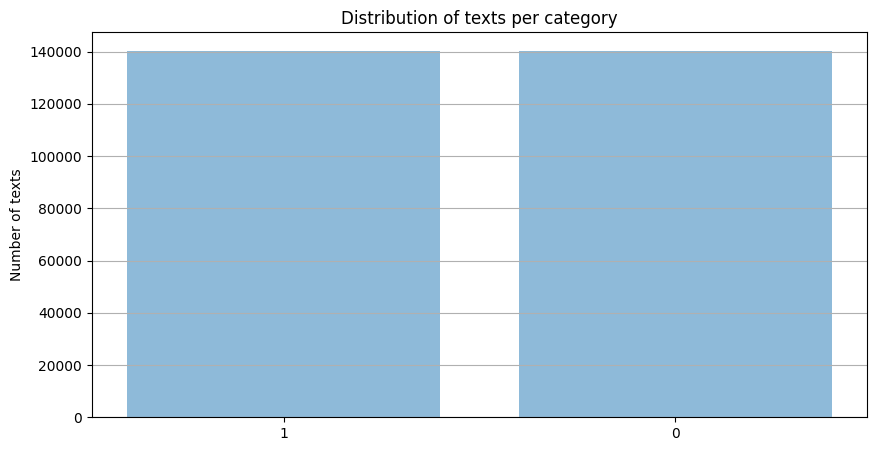

Counter({1: 140361, 0: 140029})


In [ ]:
categories = filtered_df[['label']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

In [ ]:
sampled_df = filtered_df.sample(n = 2500)

In [ ]:
sampled_df['label'].value_counts()

1    1281
0    1219
Name: label, dtype: int64

In [ ]:
comments = sampled_df.text.values
labels = sampled_df.label.values

In [ ]:
test_inputs_ = [preprocess(text) for text in comments]

In [ ]:
test_inputs = [torch.tensor(input_ids).unsqueeze(0).to(device) for input_ids, segment_ids in test_inputs_]
test_segments = [torch.tensor(segment_ids).unsqueeze(0).to(device) for input_ids, segment_ids in test_inputs_]

In [ ]:
model.eval()

preds = []
for input_ids, segments in zip(test_inputs, test_segments):
    with torch.no_grad():
        logits = model(input_ids, token_type_ids=segments)
    preds.append(logits.argmax().item())

In [ ]:
cm = confusion_matrix(np.array(labels), np.array(preds))

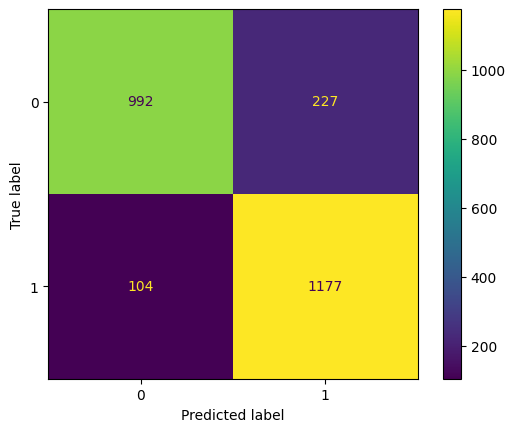

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print("FPR = " + str(cm[0][1]/len(test_inputs)))

FPR = 0.0908
